<a href="https://colab.research.google.com/github/MrT3313/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [13]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

sample.mean()


-0.0009718856029417387

In [14]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01

True

In [15]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

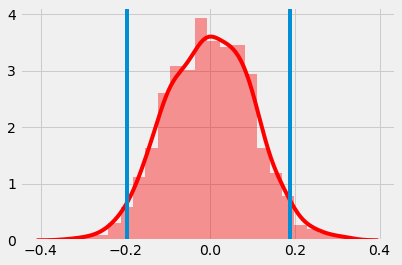

In [19]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

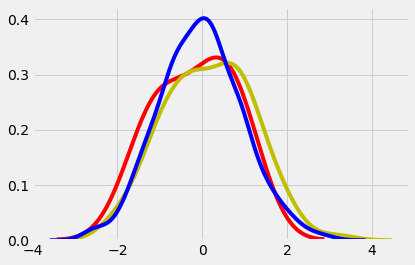

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.31273998586964813
Standard Deviation: 1.1501190874764438
Variance: 1.3227739153776474
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.08090662415049571
Standard Deviation: 1.0383358313816349
Variance: 1.0781412987309908
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.026011887125489363
Standard Deviation: 0.9716065366464899
Variance: 0.9440192620541868


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!

from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

Avg cooking time = 180(5 std) & 178.5 (4.25 std) seconds respectively

In [0]:
mu1 = 180
sigma1 = 5
n1 = 1000
sample1 = np.random.normal(mu1, sigma1,n1) 

mu2 = 178.5
sigma2 = 4.24
n2 = 800
sample2 = np.random.normal(mu2, sigma2,n2)

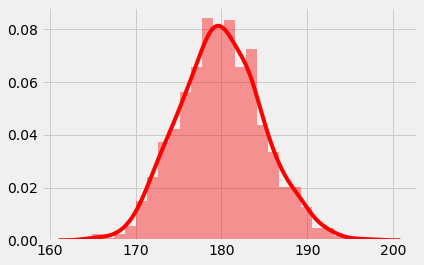

In [31]:
ax = sns.distplot(sample1, color='r')

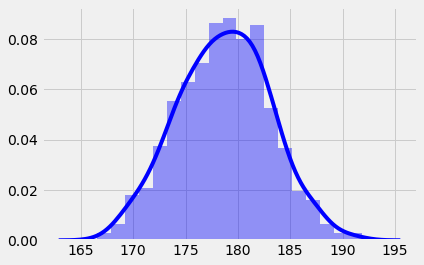

In [32]:
ax = sns.distplot(sample2, color='b')

## Before
1. Null Hypothesis ('boring hypothesis') = the booking times between the burners is the same
2. Alternative Hypothesis = the cooking times are different

In [34]:
ttest_ind(sample1,sample2)

Ttest_indResult(statistic=5.76591842577999, pvalue=9.538817505799224e-09)

## After

T-Statistic: ~~Roughly the # of standard deviations away from the mean that corresponds to the differences in means that we have observed given their sample sizes 

PValue: The probability that the difference that was observes (the t-stat) could have happened by random chance --> the area under the curve outside the t-stat

Confidence Level of 95% --> reach an incorrect conclusion less than 5% of the time

p < 1 - Confidence Level

### Interpretation
due to calculating a t-stat of 5.76 which corresponds to a p-value of .000000009, we reject the null hypothesis that the mean of cooking times between the two burners is equal and suggest the alternative hypothesis that they are different

In [0]:
# 1 Sample T Test
-- testing mean of one sample against NULL HYPOTHESIS OF OUR CHOOSING

# 2 Sample T Test
-- difference between 2 means 

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means